# 🧠 Internship Task 2 – Exploratory Data Analysis (EDA)

**Project Title:** Customer Churn Analysis and Prediction  
**Company:** Saiket Systems  
**Intern:** Farida Bashir  
**Date:** October 2025  

---

## 📋 Project Overview
The project aims to analyze customer churn in a telecommunications company and develop predictive models to identify at-risk customers.  
The goal is to provide actionable insights to reduce churn and improve retention.  

---

## 🧩 Task Description
- Calculate and visualize the overall churn rate.  
- Explore customer distribution by gender, partner status, and dependent status.  
- Analyze tenure distribution and its relation with churn.  
- Investigate churn variation across different contract types and payment methods.  

---

## 🛠️ Skills Demonstrated
- Data visualization  
- Statistical analysis  
- Exploratory data analysis  
- Understanding demographic variables  
- Churn rate calculation  

---

## ❓ Questions to Answer
1. What is the overall churn rate?  
2. How are customers distributed by gender, partner status, and dependent status?  
3. How does tenure affect churn?  
4. How does churn vary by contract type and payment method?  

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file =  ('Telco_Customer_Churn_Dataset  (3).csv')

In [3]:
df = pd.read_csv(file)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Step 1: Overall Churn Rate**

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


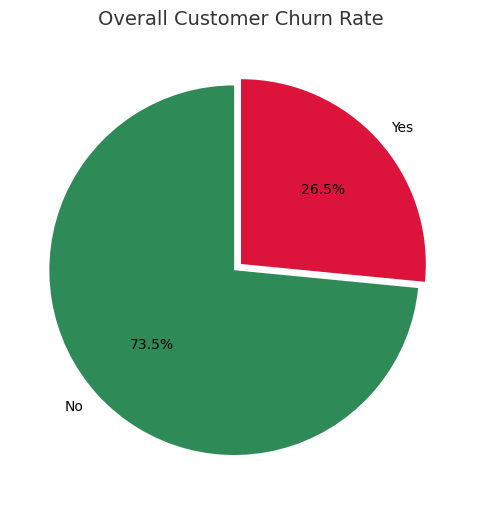

In [4]:
# Calculate the overall churn rate
churn_counts = df['Churn'].value_counts()
Churn_rate = df['Churn'].value_counts(normalize=True)* 100
print(Churn_rate)

# ----------Plot piechart ---
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%',colors=['#2E8B57', '#DC143C'], startangle=90, explode=(0.05, 0))
plt.title('Overall Customer Churn Rate' ,color='#333333', fontsize=14)

plt.show()

# ---------Display insight ---
no_churn = Churn_rate.get('No',0)
yes_churn = Churn_rate.get('Yes', 0)



 ### 📊 Insight: Overall Churn Rate

The analysis shows that **26.5% of customers have churned**, while **73.5% remain active**.  
This indicates that **over one-fourth of the customer base is leaving**, which is a significant proportion for a telecom company.

➡️ The high churn rate suggests a need for **better customer retention strategies**, such as improving service quality, offering loyalty benefits, or addressing common pain points that lead customers to leave.

**2. Customer Distribution by Gender, Partner Status, and Dependent Status**

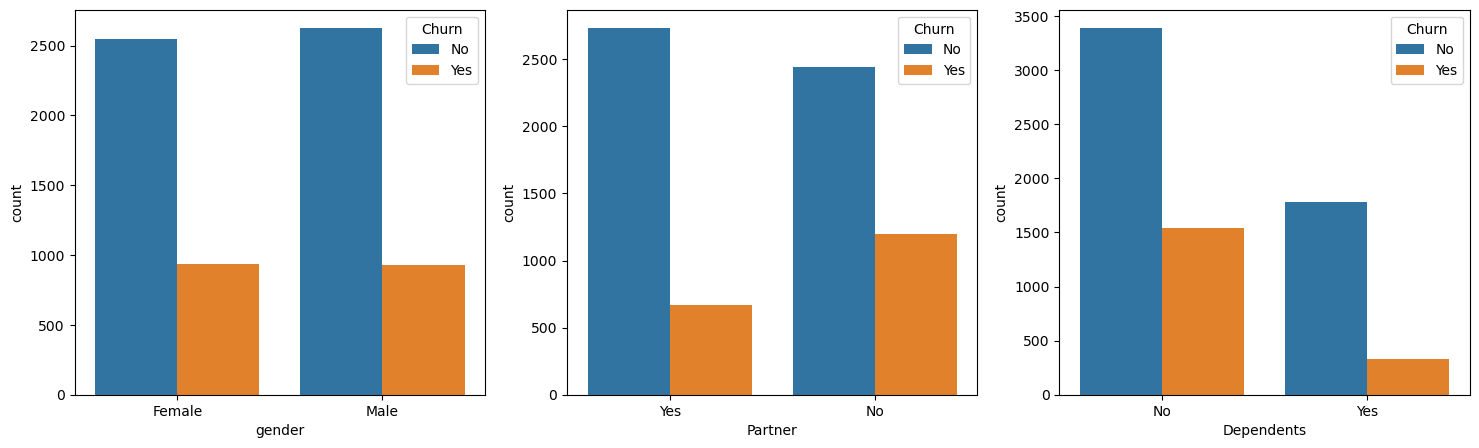

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.countplot(x='gender', hue='Churn', data=df, ax=axes[0])
sns.countplot(x='Partner', hue='Churn', data=df, ax=axes[1])
sns.countplot(x='Dependents', hue='Churn', data=df, ax=axes[2])

plt.show()

### 🔍 Summary of Insights

1. **Gender:** Both male and female customers show similar churn patterns.  
2. **Partner:** Customers **without partners** are more likely to churn.  
3. **Dependents:** Customers **without dependents** also have a higher churn rate.  

➡️ Overall, having a partner or dependents seems to reduce the likelihood of churn.

**3.Tenure Distribution & Relation with Churn**

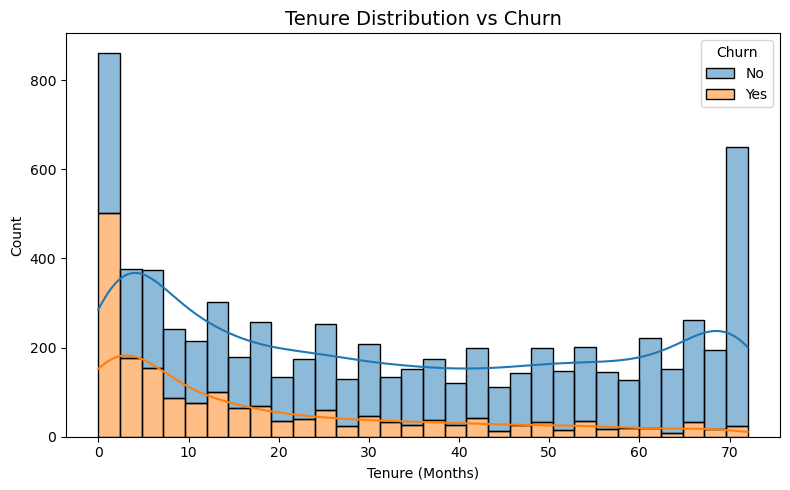

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack',palette=['#1f77b4', '#ff7f0e'],bins=30, edgecolor='black', kde=True)
plt.title('Tenure Distribution vs Churn', fontsize=14)
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**💡 Insights from Tenure Distribution**

Customers with **shorter tenure (newer customers)** show a **higher churn rate**, meaning they are more likely to leave the service early.

As tenure **increases**, the **churn rate decreases**, suggesting that **long-term customers are more loyal and satisfied**.

The distribution shows that **retention efforts should focus on new customers** within their first months of joining.

---

**4. How churn varies across contract types and payment methods**

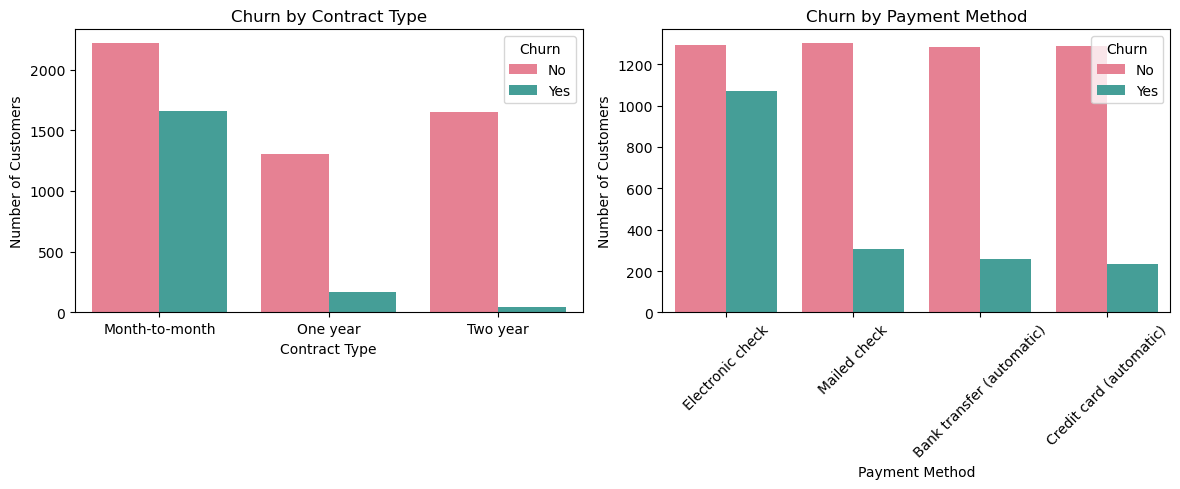

In [7]:
plt.figure(figsize=(12, 5))

# Contract Type vs Churn
plt.subplot(1, 2, 1)
sns.countplot(x='Contract', hue='Churn', data=df, palette='husl')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')

# Payment Method vs Churn
plt.subplot(1, 2, 2)
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='husl')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**💡 Insights: Contract Type vs Churn**

Customers on **month-to-month contracts** have the **highest churn rate**.
This suggests that short-term users are more likely to leave since they have less commitment and can easily switch to competitors.

Customers with **one-year or two-year contracts** show **lower churn rates**, implying that **longer contracts improve customer retention**.

Offering discounts or loyalty benefits for long-term plans may further reduce churn.

---

**💳 Insights: Payment Method vs Churn**

Customers who pay via **electronic check** tend to have **higher churn rates**.
This might be because e-check users are usually on short-term contracts or face payment difficulties.

Those using **automatic payment methods like bank transfers or credit cards** show **lower churn rates**, indicating that convenient and automated payment options help retain customers.

Encouraging users to switch from e-check to more stable payment methods could reduce churn.

---

---

### 🟢 Conclusion / Insights Summary

- The overall churn rate is **26.5%**, indicating that about one-quarter of customers are leaving the service.  
- **Customers with shorter tenures** (newer customers) tend to churn more frequently.  
- **Customers without partners or dependents** show a higher churn rate compared to those with families.  
- **Month-to-month contracts** have the highest churn, suggesting that long-term contracts help retain customers.  
- **Electronic check payments** are linked to higher churn, possibly due to convenience or lack of commitment.  

**Recommendation:**  
To reduce churn, the company should focus on improving customer experience for new and single customers, promote longer contract options, and encourage more secure payment methods.